## Importing modules

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Loading data from my personal computer
#### The data was downloaded from dataset of Kaggle

In [158]:
data = pd.read_csv(r"C:\Users\Thabiso Owen Machipi\Downloads\Customer Churn.csv")

## Understanding the data

In [159]:
# Display the first few rows
print(data.head())

# Check data types and non-null counts
print(data.info())

# Display basic statistics
print(data.describe())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

## Data Cleaning
#### Here we can check for the missing values and drop them

In [160]:
# Check for missing values
print(data.isnull().sum())

# Consider dropping or imputing any missing values if found

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## Distribution of Numerical Features

#### We can visualize the distributions of numerical

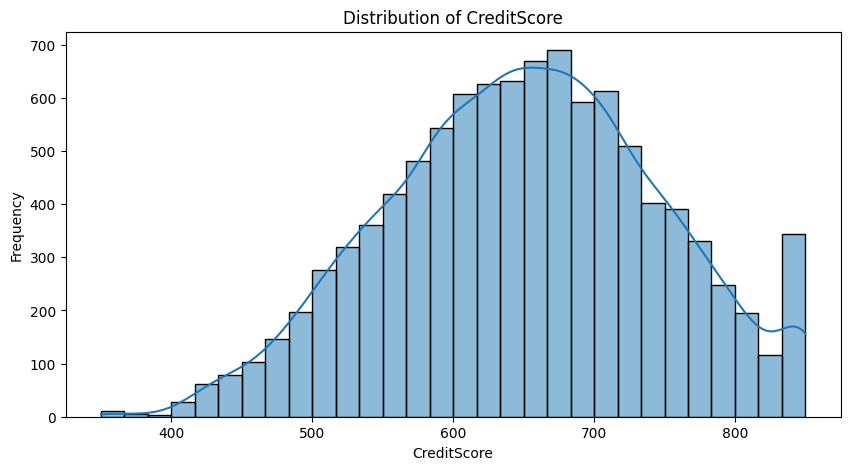

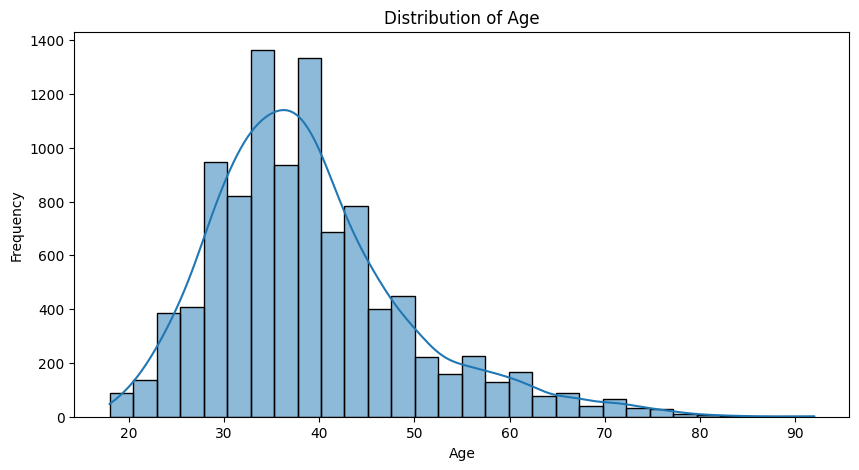

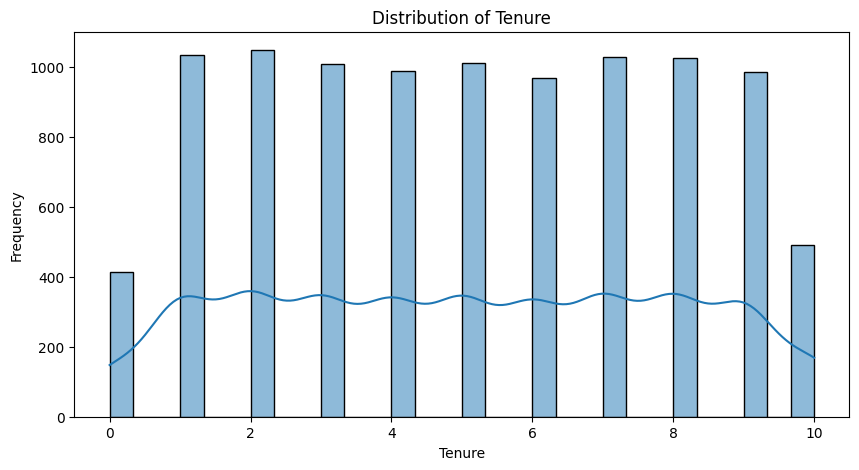

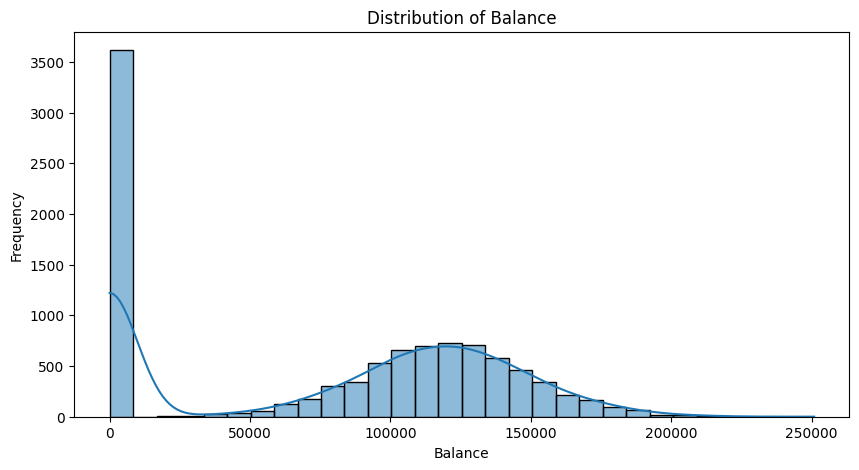

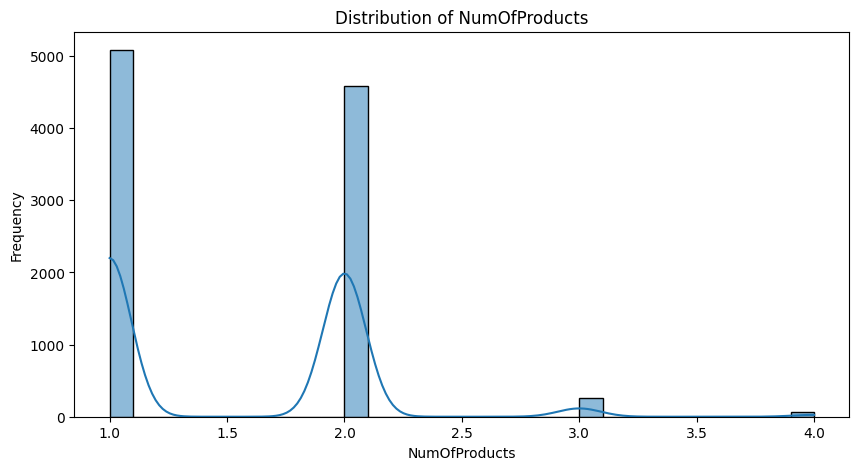

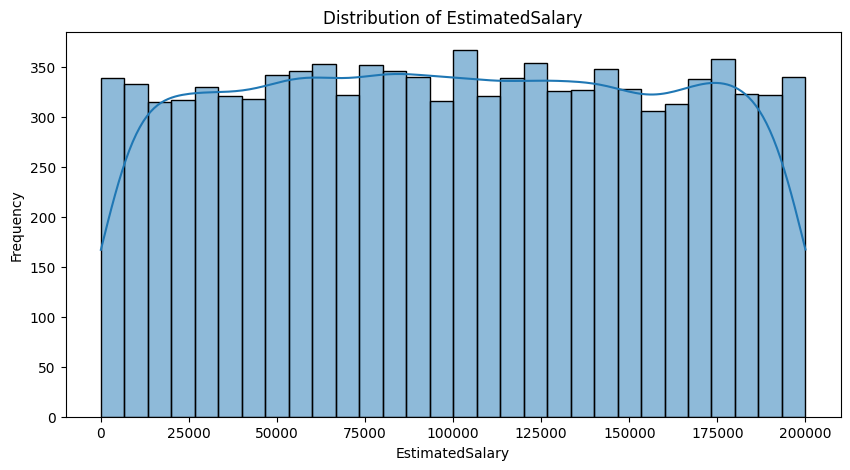

In [161]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Categorical Feature Analysis
#### We can explore the categorical features and their relationship with Exited.

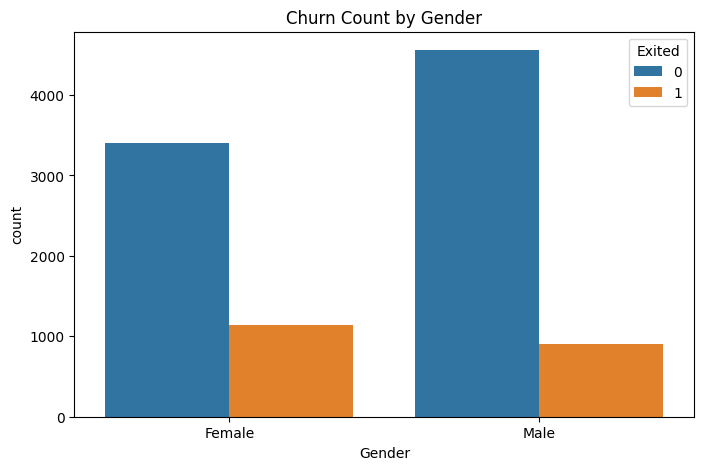

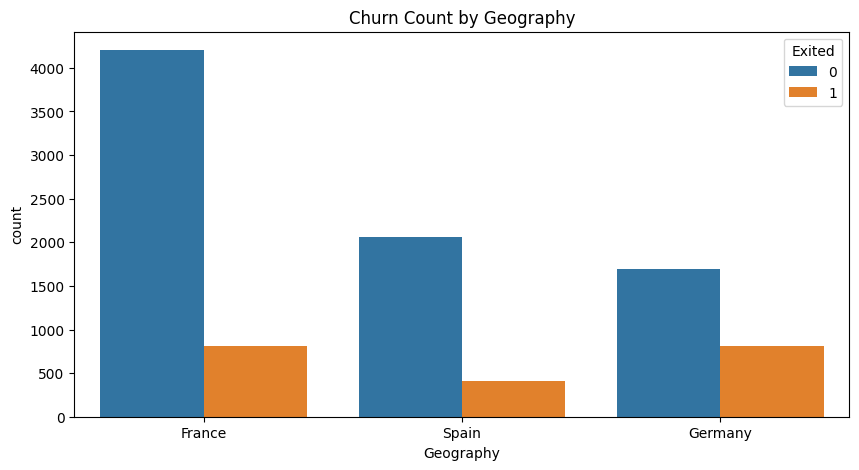

In [162]:
# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Exited', data=data)
plt.title('Churn Count by Gender')
plt.show()

# Geography distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Geography', hue='Exited', data=data)
plt.title('Churn Count by Geography')
plt.show()

## Correlation Analysis
#### We can check for correlations between numerical features and the target variable Exited.

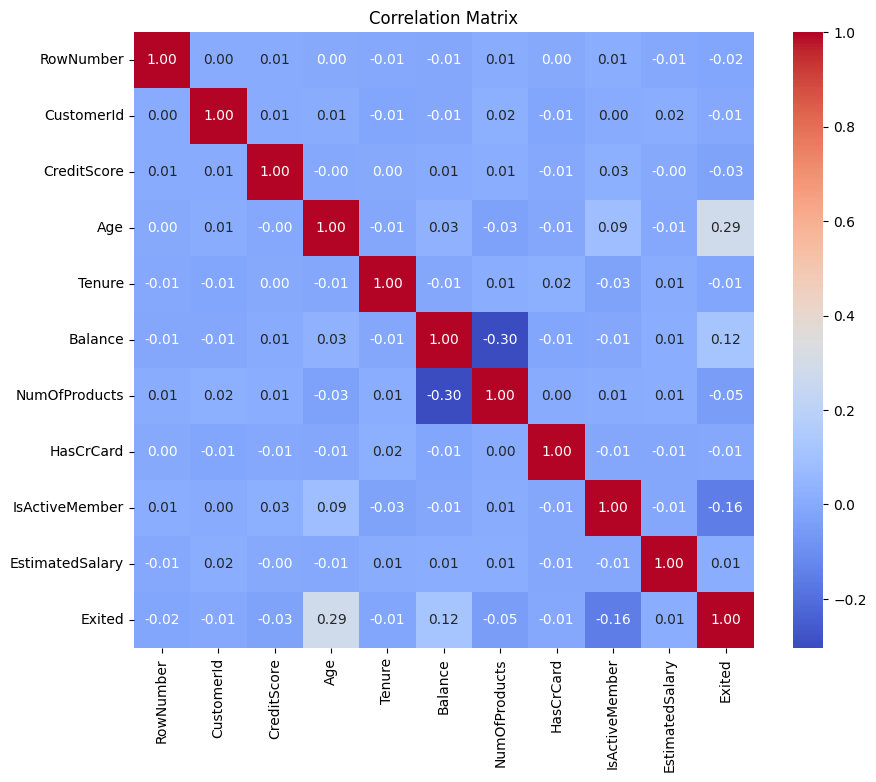

In [163]:
# Select numeric columns only
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()


# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Churn Rate Analysis
#### We can calculate the churn rate and analyze it across geography and gender.

In [164]:
# Overall churn rate
churn_rate = data['Exited'].mean()
print(f'Overall Churn Rate: {churn_rate:.2%}')

# Churn rate by geography
geography_churn = data.groupby('Geography')['Exited'].mean()
print(geography_churn)

# Churn rate by gender
gender_churn = data.groupby('Gender')['Exited'].mean()
print(gender_churn)


Overall Churn Rate: 20.37%
Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64
Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64


## Visualizing Churn Rate by Age and Credit Score
#### We can analyze how age and credit score affect churn.

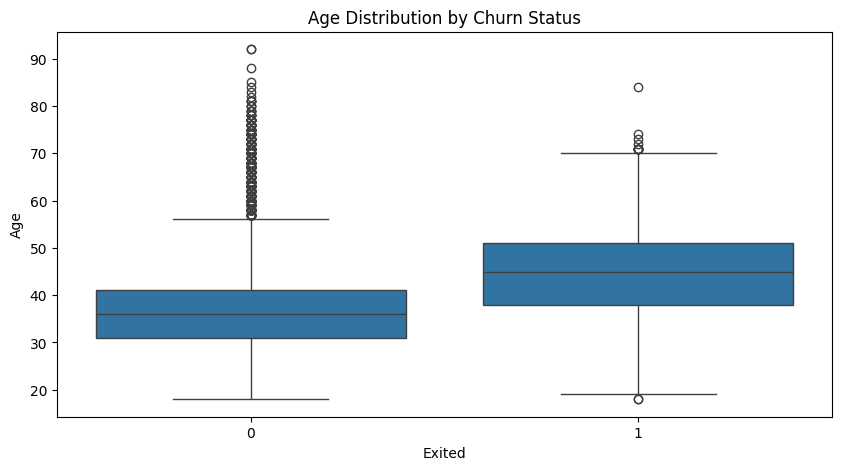

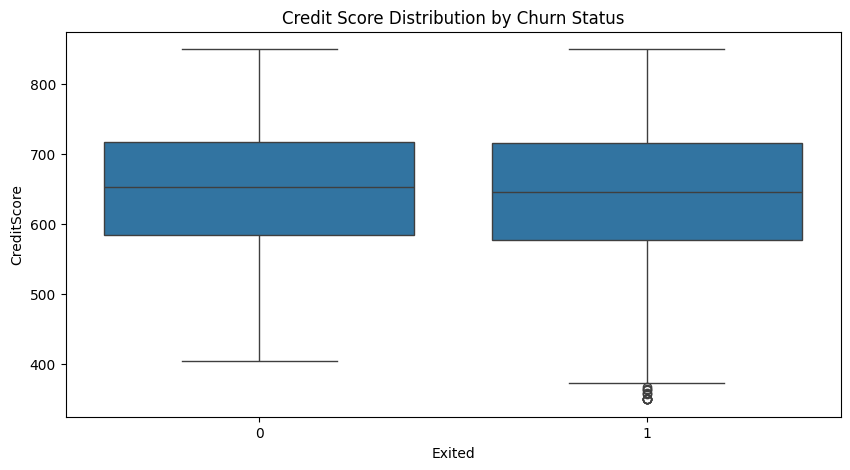

In [165]:
# Age vs. Exited
plt.figure(figsize=(10, 5))
sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Age Distribution by Churn Status')
plt.show()

# Credit Score vs. Exited
plt.figure(figsize=(10, 5))
sns.boxplot(x='Exited', y='CreditScore', data=data)
plt.title('Credit Score Distribution by Churn Status')
plt.show()

## Analyzing Churn by Age
#### Making an understanding of how age affects churn, we can provide valuable insights.

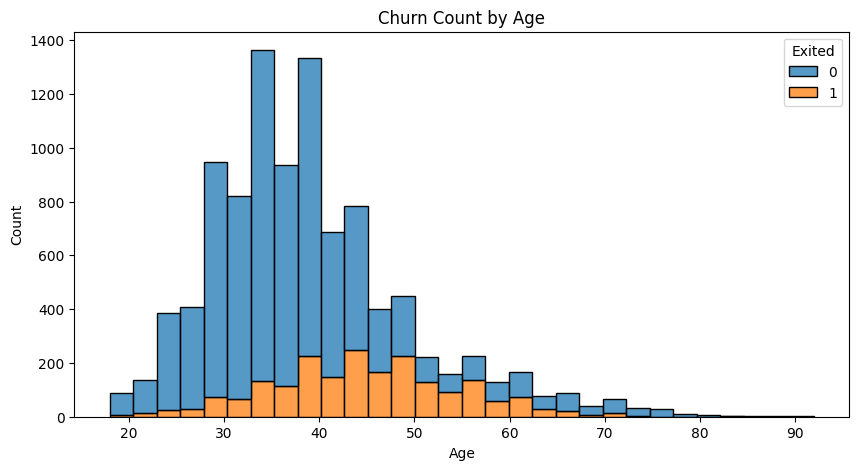

In [166]:
# Churn rate by age
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Age', hue='Exited', multiple='stack', bins=30)
plt.title('Churn Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Analyzing Churn by Credit Score
#### We can investigate how credit scores relate to churn.

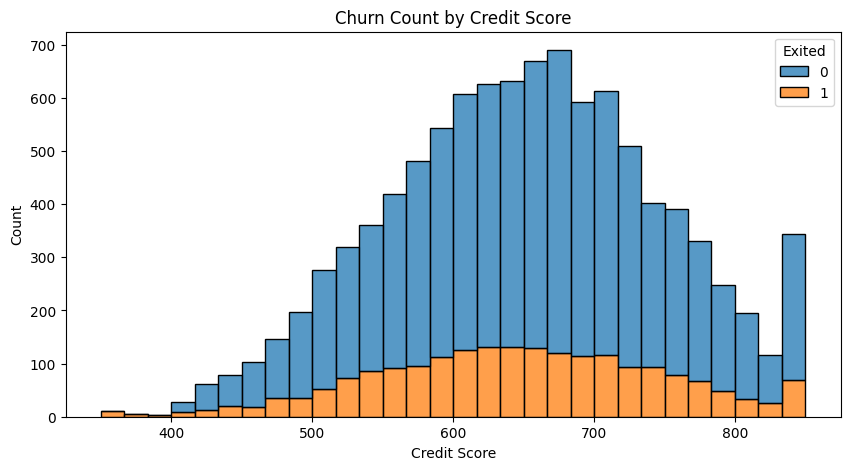

In [167]:
# Churn rate by credit score
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='CreditScore', hue='Exited', multiple='stack', bins=30)
plt.title('Churn Count by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

## Customer Balance Distribution
#### We can explore the distribution of customer balance and its relation to churn.

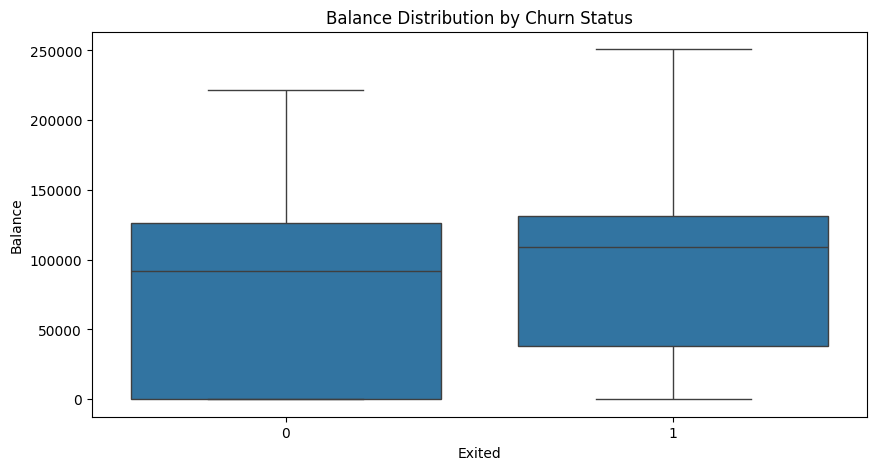

In [168]:
# Boxplot for Balance by Exited
plt.figure(figsize=(10, 5))
sns.boxplot(x='Exited', y='Balance', data=data)
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.show()

## Tenure Analysis
#### We can examine how the length of the relationship (tenure) affects churn.

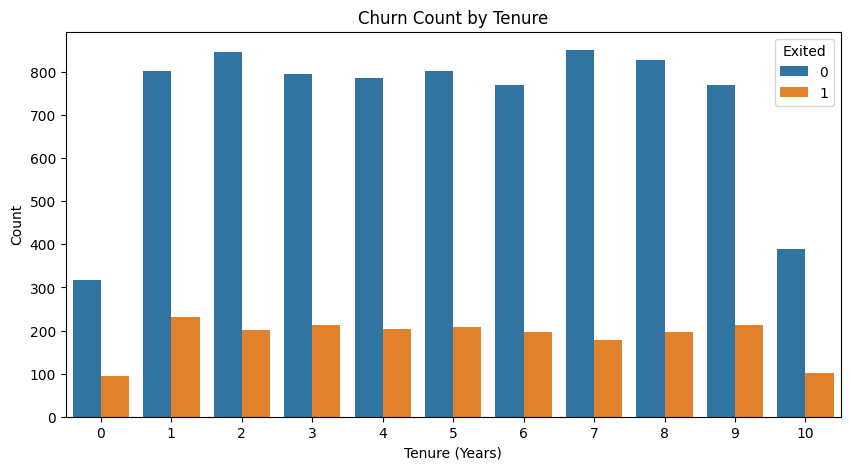

In [169]:
# Churn rate by tenure
plt.figure(figsize=(10, 5))
sns.countplot(x='Tenure', hue='Exited', data=data)
plt.title('Churn Count by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.show()

## Product Ownership and Churn
#### Analyzing how the number of products affects churn.

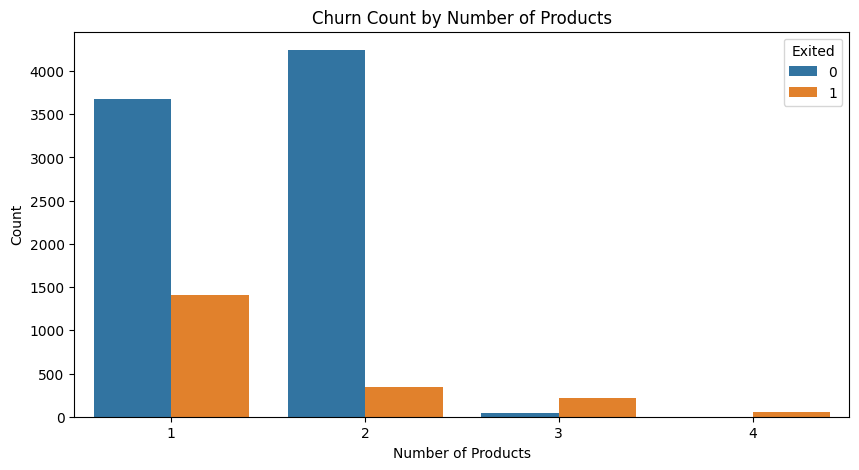

In [170]:
# Churn rate by number of products
plt.figure(figsize=(10, 5))
sns.countplot(x='NumOfProducts', hue='Exited', data=data)
plt.title('Churn Count by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

## Active Membership and Churn
#### We investigate the impact of being an active member on churn.

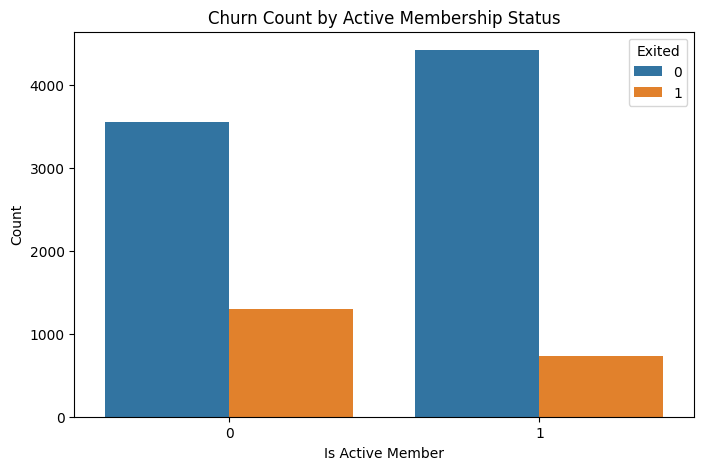

In [171]:
# Active member distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='IsActiveMember', hue='Exited', data=data)
plt.title('Churn Count by Active Membership Status')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.show()

# Salary Analysis
#### We explore the effect of estimated salary on churn.

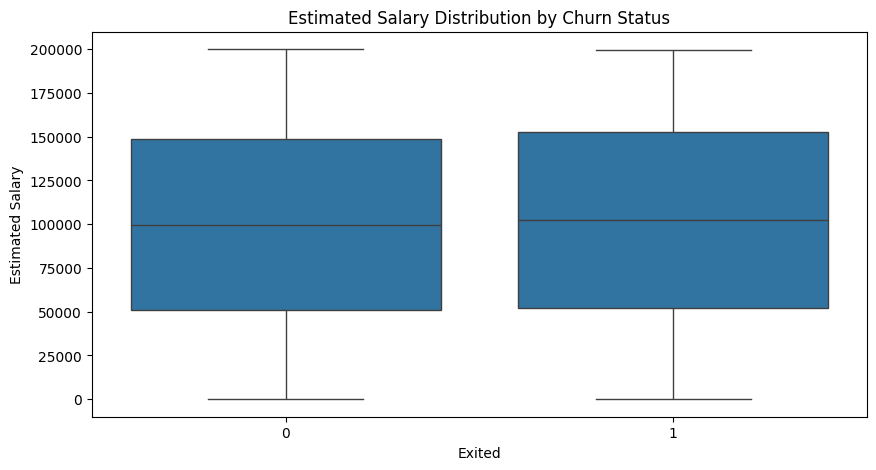

In [172]:
# Boxplot for Salary by Exited
plt.figure(figsize=(10, 5))
sns.boxplot(x='Exited', y='EstimatedSalary', data=data)
plt.title('Estimated Salary Distribution by Churn Status')
plt.xlabel('Exited')
plt.ylabel('Estimated Salary')
plt.show()

## Multivariate Analysis
#### Looking at multiple variables together. We can check how age interact with credit score and affect churn.

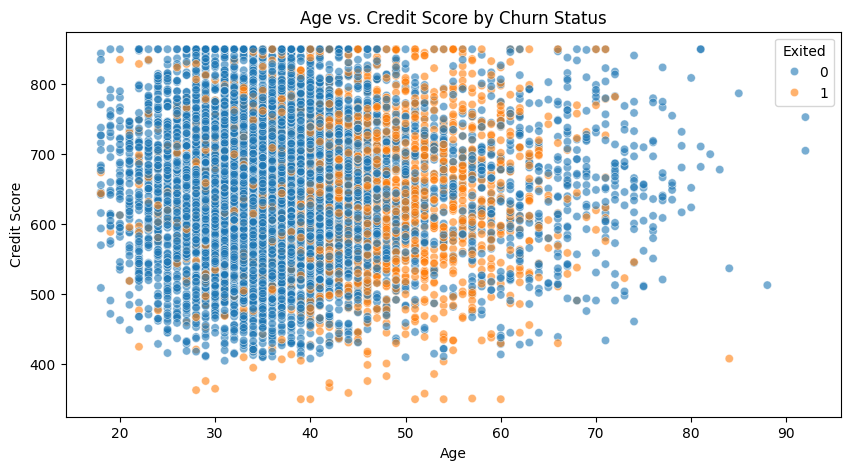

In [173]:
# Scatter plot for Age and Credit Score colored by Exited
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='CreditScore', hue='Exited', data=data, alpha=0.6)
plt.title('Age vs. Credit Score by Churn Status')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.show()

## Feature of Engineering by creating age group to predictive model using algorithm logistic regression
#### Creating age groups (or bins) is a useful way to simplify the analysis and make the data more interpretable for predictive modeling.

In [174]:
# Create age groups
bins = [18, 30, 40, 50, 60, 70, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['AgeGroup', 'Geography', 'Gender'], drop_first=True)

# Define features and target variable
X = data_encoded.drop(columns=['Exited', 'RowNumber', 'CustomerId', 'Surname'])
y = data_encoded['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the model with increased iterations
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1535   72]
 [ 267  126]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1607
           1       0.64      0.32      0.43       393

    accuracy                           0.83      2000
   macro avg       0.74      0.64      0.66      2000
weighted avg       0.81      0.83      0.81      2000

